<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-01-02-tree-based-models-decision-tree-cit-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1.2 Conditional Inference Trees

Conditional Inference Trees (CITs) are a type of decision tree algorithm used for both classification and regression tasks. Unlike traditional decision trees (e.g., CART), CITs are designed to reduce bias in variable selection and overfitting by using a statistical framework based on conditional inference. They rely on hypothesis testing to select splits, ensuring that the splitting process is statistically sound. Below, I explain how CITs work for classification and regression problems, detailing each step with the necessary mathematical foundations.




## Overview

CITs operate by recursively partitioning the input space into regions based on feature values, using a statistical test to determine the best split at each node. The key idea is to select splits that maximize the association between the predictor variables and the response variable, while controlling for multiple testing and avoiding bias toward variables with many possible splits.


### How it works

1. Define the Hypothesis Testing Framework

CITs use a statistical hypothesis testing framework to decide whether and how to split a node. The goal is to test whether a predictor variable $X_j$ is independent of the response variable $Y$, conditional on the current node’s data.

-   `Null Hypothesis` ($H_0$): The predictor $X_j$ and the response $Y$ are independent, i.e., the distribution of $Y$ does not depend on $X_j$.

-   `Alternative Hypothesis` ($H_1$): There is a dependence between $X_j$ and $Y$.

The test statistic is based on the association between $X_j$ and $Y$. The choice of test statistic depends on the type of response variable:

-   `Classification`: For a categorical response $Y$ with $K$ classes, a common choice is a permutation test based on the chi-squared statistic or a linear statistic derived from the conditional distribution.

-   `Regression`: For a continuous response `Y`, a linear statistic (e.g., based on the correlation between $X_j$ and $Y$ or a test like the ANOVA F-test is used.

The test statistic is computed as follows:

-   Let $\mathbf{X} = (X_1, X_2, \dots, X_p)$ be the $p$ predictor variables, and $Y$ be the response.

-   For a predictor $X_j$, the algorithm computes a test statistic $T_j$ that measures the association between $X_j$ and $Y$.

-   The p-value for $T_j$ is calculated using a permutation test or an asymptotic distribution, adjusted for multiple testing (e.g., Bonferroni correction).

For a linear statistic, the test statistic can be written as:

$$ T_j = \sum_{i=1}^n g(X_{ij}) h(Y_i) $$

where:

-   $g(X_{ij})$ is a transformation of the predictor $X_j$ for observation $i$ (e.g., rank or indicator function for splits).

-   $h(Y_i)$ is a transformation of the response (e.g., class indicator for classification, or the response value for regression).

-   The expectation and variance of $T_j$ under $H_0$ are computed conditionally on the observed data, and the p-value is derived from the standardized statistic:

$$ Z_j = \frac{T_j - E(T_j)}{\sqrt{\text{Var}(T_j)}} $$

The p-value is then $p_j = P(|Z_j| > |z_j| \mid H_0)$, where $z_j$ is the observed value of $Z_j$.

2. Variable Selection

At each node, CITs select the predictor variable $X_j$ that has the strongest association with $Y$, based on the smallest p-value from the hypothesis tests.

-   Compute the test statistic $T_j$ and p-value $p_j$ for each predictor $X_j$ ($j = 1, \dots, p$).

-   Adjust the p-values for multiple testing (e.g., using Bonferroni correction: $p_j^{\text{adj}} = \min(p_j \cdot p, 1)$).

-   Select the variable $X_j^*$ ) with the smallest adjusted p-value, provided it is below a predefined significance threshold $\alpha$ (e.g., $\alpha = 0.05$):

$$ j^* = \arg\min_j p_j^{\text{adj}}. $$

-   If no p-value is below $\alpha$ the node is not split, and it becomes a terminal node.

The decision rule is:

$$ \text{If } \min_j p_j^{\text{adj}} < \alpha, \text{ select } X_{j^*}; \text{ else, stop splitting.} $$

**Classification vs. Regression**:

-   For classification, the test statistic often measures the difference in class distributions across possible splits (e.g., using a chi-squared test).
-   For regression, the test statistic measures the difference in means or variances of ( Y ) across splits (e.g., using an F-test or correlation-based statistic).

3. Split Point Selection

Once the best predictor $X_j^*$ is selected, the algorithm determines the optimal split point for that variable. The split divides the node’s data into two child nodes based on a condition like $X_j^* \leq s$ and $X_j^* > s$.

-   For a continuous or ordinal predictor, evaluate all possible split points $s$.
-   For a categorical predictor, consider all possible binary partitions of the categories.
-   The split point is chosen to maximize the association between the split and the response $Y$, often by maximizing the test statistic or minimizing the p-value of a two-sample test.

For a split point $s$, define the two regions: - Left child: $\{i : X_{ij^*} \leq s\}$. - Right child: $\{i : X_{ij^*} > s\}$.

Compute a two-sample test statistic for the response $Y$ in the two regions. For example:

-   **Classification**: Use a chi-squared test to compare the class distributions in the two regions.
-   **Regression**: Use a t-test or F-test to compare the means of $Y$ in the two regions.

The optimal split point $s^*$ is:

$$ s^* = \arg\max_s T(s),$$

where $T(s)$ is the test statistic for the split at $s$. Alternatively, the split can minimize the p-value of the two-sample test.

4. Recursive Partitioning

After selecting the predictor $X_j^*$ and split point $s^*$, the node is split into two child nodes:

-   Left child: Observations where $X_j^* \leq s^*$.

-   Right child: Observations where $X_j^* > s^*$.

The algorithm then recursively applies Steps 1–3 to each child node, treating the data in each child node as a new dataset. This process continues until a stopping criterion is met.

5. topping Criteria

The recursion stops when one of the following conditions is satisfied:

-   No predictor has an adjusted p-value below the significance threshold $\alpha$, indicating no significant association with $Y$.
-   The node contains fewer than a minimum number of observations (e.g., $n_{\min}$).
-   The maximum tree depth is reached (optional, user-specified).
-   The response values in the node are sufficiently homogeneous (e.g., all observations belong to the same class for classification, or the variance of $Y$ is below a threshold for regression).

For regression, homogeneity can be assessed using the variance of $Y$ in the node:

$$ \text{Var}(Y) = \frac{1}{n} \sum_{i=1}^n (Y_i - \bar{Y})^2, $$

where $\bar{Y}$ is the mean of $Y$ in the node.

If $\text{Var}(Y)$ is small, further splitting may not be necessary.

6. Prediction

Once the tree is built, predictions are made as follows:

-   **Classification**:

-   For a new observation with features $\mathbf{x}$, traverse the tree by following the decision rules until a terminal node is reached.

-   The predicted class is the majority class in the terminal node:

$$\hat{y} = \arg\max_k \frac{n_k}{n} $$

where $n_k$ is the number of observations of class $k$ in the terminal node, and $n$ is the total number of observations in the node.

-   **Regression**:

-   Traverse the tree to reach a terminal node.

-   The predicted value is the mean of the response values in the terminal node:

$$ \hat{y} = \frac{1}{n} \sum_{i \in \text{node}} Y_i. $$



The below figure summarizes the workflow of a Conditional Inference Tree (CIT):

![alt text](http://drive.google.com/uc?export=view&id=1gsrt0fg5XUnWjX8iQqylEA5TX4TXyOld)

### Differences Between Classification and Regression

| Aspect | Classification | Regression |
|------------------------|------------------------|------------------------|
| `Response Variable` | Categorical ($Y \in \{1, \dots, K\}$) | Continuous ($Y \in \mathbb{R}$) |
| `Test Statistic` | Chi-squared, permutation test | F-test, t-test, correlation-based |
| `Split Criterion` | Maximize class separation (e.g., Gini) | Minimize variance or maximize mean difference |
| `Prediction` | Majority class in terminal node | Mean of response in terminal node |


### Advantages of CITs

-   `Unbiased Variable Selection`: Unlike CART, which favors variables with many split points, CITs use p-values to ensure fairness.
-   `Statistical Rigor`: The use of hypothesis testing controls overfitting and provides a principled stopping rule.
-   `Flexibility`: Works for both classification and regression, handling mixed predictor types (continuous, categorical).

### Limitations

-   `Computational Cost`: Permutation tests and p-value adjustments can be computationally intensive.
-   `Interpretability`: Deep trees may still be complex to interpret.
-   `Performance`: May not always outperform other methods (e.g., random forests) in predictive accuracy.

### How Does a Conditional Inference Tree Differ from a Traditional Decision Tree?

Conditional Inference Trees (CITs) and traditional decision trees (like CART) are both tree-based models used for classification and regression. However, they differ significantly in their approach to splitting data and handling variable selection. Below is a comparison of the two methods:

| **Aspect** | **Conditional Inference Tree (CIT)** | **Traditional Decision Tree (e.g., CART)** |
|------------------------|------------------------|------------------------|
| `Splitting Criterion` | Uses statistical hypothesis tests (p-values) to select splits. | Uses heuristic measures like Gini impurity, entropy, or variance reduction. |
| `Variable Selection Bias` | Unbiased; avoids favoring variables with more categories or values. | Biased toward variables with more split points (e.g., continuous or multi-level categorical variables). |
| `Statistical Foundation` | Grounded in statistical theory, with control for multiple testing. | Heuristic-based, lacking formal statistical guarantees. |
| `Overfitting Control` | Stops splitting when no significant association is found, reducing overfitting. | Relies on pruning or maximum depth to control overfitting, which may not be statistically justified. |
| `Interpretability` | Similar interpretability, but splits are statistically justified. | Highly interpretable, but splits may be less reliable due to bias. |
| `Flexibility` | Handles mixed data types well; less sensitive to data distribution. | Flexible but may require preprocessing for certain data types. |
| `Computational Complexity` | Slightly higher due to statistical testing at each node. | Generally faster due to simpler heuristic calculations. |

Below are the key differences in practice:

-   `Bias in Variable Selection`: In a traditional decision tree, a categorical variable with 10 categories might be preferred over one with 2 categories because it offers more splitting options. CITs avoid this by using p-values, making variable selection fairer.
-   `Statistical Rigor`: CITs provide a more rigorous framework, as splits are based on statistically significant associations, which can lead to more reliable models in settings where interpretability and statistical validity are crucial (e.g., medical or social sciences).
-   `Overfitting`: CITs naturally limit tree growth by stopping when no significant splits are found, whereas traditional trees may grow excessively and require post-pruning.

## Setup R in Python Runtype

### Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314975 sha256=af4031aea50505079f645109043b965ea222718719fdde79a27684e6f59368e7
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Conditional Inference Tree (CIT) from Scratch in R

Conditional Inference Trees (CIT) are an advanced type of decision tree that use statistical tests to select splits, reducing bias toward features with many possible splits (unlike CART, which uses Gini or MSE). Implementing CIT from scratch in R without packages is complex due to the need for statistical tests (e.g., permutation tests) for split selection. Since you previously requested no R packages for CART and encountered issues with the Boston Housing and Iris datasets, I’ll provide a simplified implementation of CIT in base R, focusing on core concepts while maintaining compatibility with your prior context (classification on Iris, regression on Boston Housing).

### Classification Example

For classification, we’ll: - Test each feature’s association with `Species` using a chi-squared test on discretized feature values. - Select the feature and threshold with the lowest p-value. - Recursively split until a significance threshold (e.g., p > 0.05) or other criteria (max depth, min size) are met.

#### Data

We will create a synthetic dataset that mimics the Iris dataset, ensuring that the features are numeric and the target variable is a factor. This will help us avoid issues with factor levels and ensure that the model can be trained effectively.


In [ ]:
%%R
# Set seed for reproducibility
set.seed(123)

# Number of observations
n <- 150

# Synthetic features mimicking Iris dataset
data <- data.frame(
  sepal_length = runif(n, 4, 8),       # Sepal length (range similar to Iris: 4.3 to 7.9)
  sepal_width = runif(n, 2, 4.5),      # Sepal width (range similar to Iris: 2.0 to 4.4)
  petal_length = runif(n, 1, 7),       # Petal length (range similar to Iris: 1.0 to 6.9)
  petal_width = runif(n, 0.1, 2.5),    # Petal width (range similar to Iris: 0.1 to 2.5)
  species = factor(sample(c("setosa", "versicolor", "virginica"), n, replace = TRUE,
                          prob = c(0.33, 0.33, 0.34)))  # Species with roughly equal distribution
)

# View the first few rows
head(data)

  sepal_length sepal_width petal_length petal_width   species
1     5.150310    4.118633     5.707452   1.3571742 virginica
2     7.153221    3.243818     1.056579   0.9395243    setosa
3     5.635908    2.969773     5.674395   0.6772737 virginica
4     7.532070    2.616122     5.376344   0.2396603 virginica
5     7.761869    2.277741     4.780791   0.6678874 virginica
6     4.182226    2.974986     3.885465   2.2361870    setosa


#### Define CIT Functions for Classification

1. `discretize`: Converts a numeric feature into discrete bins using quantiles.
   - Checks for sufficient unique values; if too few, returns a factor or single bin.
   - Creates bins based on quantiles, adjusting breaks if needed, and handles NAs by assigning them to bin 1.

2. `chi_squared_test`: Tests association between a feature and target using a chi-squared test.
   - Skips if too few unique values or invalid contingency table (e.g., zeros or small counts).
   - Returns p-value; defaults to 1 if test fails or returns NA.

3. `find_best_split_class`: Identifies the best binary split for numeric features.
   - Iterates over numeric features and possible thresholds (midpoints of sorted values).
   - Discretizes feature at each threshold, tests with chi-squared, and tracks split with lowest p-value.
   - Returns feature, threshold, p-value, and indices for left/right splits; returns NULL if no valid split.

4. `build_tree_class`: Recursively builds a classification tree.
   - Stops if: single class, too few rows, or max depth reached; returns a leaf with majority class.
   - Finds best split; if none or p-value > alpha, returns a leaf.
   - Splits data and recursively builds left/right subtrees, returning a node with feature, threshold, and subtrees.

5. `predict_tree_class`: Predicts class for a single row using the tree.
   - Returns leaf's class if at a leaf.
   - Traverses left or right subtree based on feature value relative to threshold (handles NAs by going left).


In [ ]:
%%R
# Discretize a numeric feature into bins
discretize <- function(x, breaks = 4) {
  if (length(unique(x[!is.na(x)])) < 2) {
    cat("Discretize: too few unique values, returning as factor\n")
    return(as.factor(x))
  }
  n_unique <- length(unique(x[!is.na(x)]))
  if (n_unique < breaks) breaks <- n_unique
  if (breaks < 2) {
    cat("Discretize: forcing single bin\n")
    return(rep(1, length(x)))
  }
  quantiles <- quantile(x, probs = seq(0, 1, length.out = breaks + 1), na.rm = TRUE)
  quantiles <- unique(quantiles)
  if (length(quantiles) < 2) {
    cat("Discretize: quantiles collapsed, forcing single bin\n")
    return(rep(1, length(x)))
  }
  if (length(quantiles) < breaks + 1) {
    breaks <- length(quantiles) - 1
    cat("Discretize: reduced breaks to", breaks, "\n")
  }
  result <- cut(x, breaks = quantiles, include.lowest = TRUE, labels = FALSE)
  if (any(is.na(result))) result[is.na(result)] <- 1
  result
}

# Chi-squared test for feature-target association
chi_squared_test <- function(feature, target) {
  if (length(unique(feature)) < 2 || length(unique(target)) < 2) {
    cat("Skipping chi-squared test: too few unique values\n")
    return(1)
  }
  table_data <- table(feature, target)
  if (any(dim(table_data) < 2) || any(table_data == 0) || sum(table_data) < 10) {
    cat("Invalid contingency table:\n")
    print(table_data)
    return(1)
  }
  test <- try(chisq.test(table_data, correct = FALSE), silent = TRUE)
  if (inherits(test, "try-error") || is.na(test$p.value)) {
    cat("Chi-squared test failed or returned NA\n")
    return(1)
  }
  test$p.value
}

# Find best split based on p-value
find_best_split_class <- function(data, target) {
  features <- names(data)[names(data) != target]
  numeric_features <- features[sapply(data[features], is.numeric)]

  best_pvalue <- 1
  best_feature <- NULL
  best_threshold <- NULL
  best_split <- NULL

  for (feature in numeric_features) {
    values <- sort(unique(data[[feature]][!is.na(data[[feature]])]))
    if (length(values) < 2) {
      cat("Skipping feature", feature, ": too few unique values\n")
      next
    }
    thresholds <- (values[-length(values)] + values[-1]) / 2

    for (threshold in thresholds) {
      left_idx <- data[[feature]] <= threshold & !is.na(data[[feature]])
      right_idx <- data[[feature]] > threshold & !is.na(data[[feature]])
      if (sum(left_idx) < 5 || sum(right_idx) < 5) {
        cat("Skipping threshold", threshold, "for", feature, ": too few observations\n")
        next
      }

      split_feature <- discretize(as.numeric(data[[feature]] <= threshold))
      pvalue <- chi_squared_test(split_feature, data[[target]])

      if (is.na(pvalue)) {
        cat("NA p-value for feature", feature, "at threshold", threshold, "\n")
        next
      }

      if (pvalue < best_pvalue) {
        best_pvalue <- pvalue
        best_feature <- feature
        best_threshold <- threshold
        best_split <- list(left_idx = left_idx, right_idx = right_idx)
      }
    }
  }

  if (is.null(best_feature)) {
    cat("No valid split found\n")
  }

  list(feature = best_feature, threshold = best_threshold,
       pvalue = best_pvalue, split = best_split)
}

# Build conditional inference tree
build_tree_class <- function(data, target, max_depth = 3, min_size = 5, depth = 0, alpha = 0.05) {
  classes <- data[[target]]

  # Stopping criteria
  if (length(unique(classes)) == 1 || nrow(data) < min_size || depth >= max_depth) {
    return(list(
      is_leaf = TRUE,
      class = names(sort(table(classes), decreasing = TRUE))[1]
    ))
  }

  # Find best split
  split_info <- find_best_split_class(data, target)
  if (is.null(split_info$feature) || split_info$pvalue > alpha) {
    return(list(
      is_leaf = TRUE,
      class = names(sort(table(classes), decreasing = TRUE))[1]
    ))
  }

  # Split data
  left_data <- data[split_info$split$left_idx, ]
  right_data <- data[split_info$split$right_idx, ]

  # Build subtrees
  left_subtree <- build_tree_class(left_data, target, max_depth, min_size, depth + 1, alpha)
  right_subtree <- build_tree_class(right_data, target, max_depth, min_size, depth + 1, alpha)

  # Return node
  list(
    is_leaf = FALSE,
    feature = split_info$feature,
    threshold = split_info$threshold,
    left = left_subtree,
    right = right_subtree
  )
}

# Predict for a single observation
predict_tree_class <- function(tree, row) {
  if (tree$is_leaf) return(tree$class)
  if (is.na(row[[tree$feature]]) || row[[tree$feature]] <= tree$threshold) {
    predict_tree_class(tree$left, row)
  } else {
    predict_tree_class(tree$right, row)
  }
}

#### Fit the Model


In [ ]:
%%R
set.seed(123)
n <- nrow(data)
train_idx <- sample(1:n, 0.8 * n)
train_data <- iris[train_idx, ]
test_data <- iris[-train_idx, ]

# Ensure no NA in target
train_data <- train_data[!is.na(train_data$Species), ]
test_data <- test_data[!is.na(test_data$Species), ]

# Build tree
tree <- build_tree_class(train_data, "Species", max_depth = 3, min_size = 5, alpha = 0.05)

Skipping threshold 4.35 for Sepal.Length : too few observations
Skipping threshold 4.45 for Sepal.Length : too few observations
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-squared test: too few unique values
Discretize: reduced breaks to 1 
Skipping chi-square

#### Prediction and Evaluation

In [ ]:
%%R
# Predict on test data
predictions <- apply(test_data, 1, function(row) predict_tree_class(tree, row))

# Check for NA in predictions
if (any(is.na(predictions))) {
  cat("Warning: NA values in predictions\n")
}

# Evaluate accuracy
accuracy <- mean(predictions == test_data$Species, na.rm = TRUE)
cat("Classification Accuracy:", accuracy, "\n")

Classification Accuracy: 0.1666667 


### Regression Example





#### Data

We will create a synthetic dataset that mimics the Boston Housing dataset, ensuring that the `rooms` feature is numeric and `medv` is calculated after the data frame is created. This will help us avoid issues with factor levels and ensure that the model can be trained effectively.

In [ ]:
%%R
# Set seed for reproducibility
set.seed(123)

# Number of observations
n <- 506

# Synthetic features mimicking Boston Housing dataset (initial creation without medv)
data <- data.frame(
  crim = runif(n, 0, 90),              # Per capita crime rate
  zn = sample(c(0, 18, 25, 35), n, replace = TRUE, prob = c(0.7, 0.1, 0.1, 0.1)),  # Proportion of zoned land
  indus = runif(n, 0, 27),             # Proportion of non-retail business acres
  chas = sample(c(0, 1), n, replace = TRUE, prob = c(0.9, 0.1)),  # Charles River dummy
  nox = runif(n, 0.38, 0.87),          # Nitric oxides concentration
  rooms = as.numeric(runif(n, 3, 9)),  # Average number of rooms (explicitly numeric)
  age = runif(n, 0, 100),              # Proportion of old units
  dis = runif(n, 1, 12),               # Weighted distance to employment centers
  rad = sample(1:24, n, replace = TRUE),  # Accessibility to highways
  tax = runif(n, 187, 711),            # Property tax rate
  ptratio = runif(n, 12, 22),          # Pupil-teacher ratio
  b = runif(n, 0, 396),                # Proportion of Black residents (transformed)
  lstat = runif(n, 1, 37)              # Lower status population percentage
)

# Calculate medv after the data frame is created
data$medv <- 20 + 0.1 * (8 - data$rooms) + 0.2 * data$lstat + 0.05 * data$crim + rnorm(n, 0, 5)

# Ensure medv stays within a reasonable range
data$medv <- pmax(5, pmin(50, data$medv))

# Verify rooms is numeric
if (!is.numeric(data$rooms)) {
  data$rooms <- as.numeric(as.character(data$rooms))
  if (!is.numeric(data$rooms)) stop("Failed to convert rooms to numeric!")
}

# View the first few rows and structure to confirm
str(data)  # Check data structure

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  25.9 70.9 36.8 79.5 84.6 ...
 $ zn     : num  0 0 18 0 0 0 35 0 25 0 ...
 $ indus  : num  4.999 13.689 0.518 20.89 15.111 ...
 $ chas   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.435 0.503 0.713 0.663 0.584 ...
 $ rooms  : num  8.14 6.3 6.99 6 8.54 ...
 $ age    : num  45.33 8.33 36.52 89.5 54.44 ...
 $ dis    : num  6.21 6.95 11.71 11.7 8.54 ...
 $ rad    : int  5 13 2 14 18 6 6 16 1 3 ...
 $ tax    : num  685 572 188 591 367 ...
 $ ptratio: num  16.5 18.4 20 17.4 20.8 ...
 $ b      : num  199.4 241.3 195.4 77.3 202.8 ...
 $ lstat  : num  35.32 27.02 8.62 14.52 24.88 ...
 $ medv   : num  19 34.3 23.7 21.6 25.1 ...


#### Define CIT Functions for Regression


1. `f_test`: Tests association between a feature and numeric target using an F-test via linear regression.
   - Skips if too few unique values or groups < 2 levels; returns 1 if test fails.
   - Returns p-value from ANOVA of the regression model.

2. `find_best_split_reg`: Finds the best binary split for numeric features in regression.
   - Iterates over features and thresholds (midpoints of sorted values).
   - Tests splits using f_test, tracking the split with the lowest p-value.
   - Returns feature, threshold, p-value, and split indices; returns NULL if no valid split.

3. `build_tree_reg`: Recursively builds a regression tree.
   - Stops if too few rows, max depth reached, or all target values are NA; returns a leaf with mean target value (0 if all NA).
   - Uses best split if p-value < alpha; otherwise, returns a leaf.
   - Splits data and builds left/right subtrees.

4. `predict_tree_reg`: Predicts a numeric value for a single row.
   - Returns leaf’s value (0 if NA) or traverses left/right subtree based on feature value vs. threshold (NAs go left).

In [ ]:
%%R
# F-test for feature-target association
f_test <- function(feature, target) {
  if (length(unique(feature)) < 2 || length(unique(target)) < 2) {
    cat("Skipping F-test: too few unique values\n")
    return(1)
  }
  groups <- as.factor(feature)
  if (length(levels(groups)) < 2) {
    cat("F-test: groups have fewer than 2 levels\n")
    return(1)
  }
  fit <- try(lm(target ~ groups), silent = TRUE)
  if (inherits(fit, "try-error")) {
    cat("F-test: lm failed\n")
    return(1)
  }
  anova_result <- anova(fit)
  anova_result$"Pr(>F)"[1]
}

# Find best split for regression
find_best_split_reg <- function(data, target) {
  features <- names(data)[names(data) != target]
  numeric_features <- features[sapply(data[features], is.numeric)]

  best_pvalue <- 1
  best_feature <- NULL
  best_threshold <- NULL
  best_split <- NULL

  for (feature in numeric_features) {
    values <- sort(unique(data[[feature]][!is.na(data[[feature]])]))
    if (length(values) < 2) {
      cat("Skipping feature", feature, ": too few unique values\n")
      next
    }
    thresholds <- (values[-length(values)] + values[-1]) / 2

    for (threshold in thresholds) {
      left_idx <- data[[feature]] <= threshold & !is.na(data[[feature]])
      right_idx <- data[[feature]] > threshold & !is.na(data[[feature]])
      if (sum(left_idx) < 5 || sum(right_idx) < 5) {
        cat("Skipping threshold", threshold, "for", feature, ": too few observations\n")
        next
      }

      split_feature <- as.numeric(data[[feature]] <= threshold)
      pvalue <- f_test(split_feature, data[[target]])

      if (is.na(pvalue)) {
        cat("NA p-value for feature", feature, "at threshold", threshold, "\n")
        next
      }

      if (pvalue < best_pvalue) {
        best_pvalue <- pvalue
        best_feature <- feature
        best_threshold <- threshold
        best_split <- list(left_idx = left_idx, right_idx = right_idx)
      }
    }
  }

  if (is.null(best_feature)) {
    cat("No valid split found\n")
  }

  list(feature = best_feature, threshold = best_threshold,
       pvalue = best_pvalue, split = best_split)
}

# Build regression tree
build_tree_reg <- function(data, target, max_depth = 3, min_size = 5, depth = 0, alpha = 0.05) {
  values <- data[[target]]

  if (nrow(data) < min_size || depth >= max_depth || all(is.na(values))) {
    return(list(
      is_leaf = TRUE,
      value = if (all(is.na(values))) 0 else mean(values, na.rm = TRUE)
    ))
  }

  split_info <- find_best_split_reg(data, target)
  if (is.null(split_info$feature) || split_info$pvalue > alpha) {
    return(list(
      is_leaf = TRUE,
      value = if (all(is.na(values))) 0 else mean(values, na.rm = TRUE)
    ))
  }

  left_data <- data[split_info$split$left_idx, ]
  right_data <- data[split_info$split$right_idx, ]

  left_subtree <- build_tree_reg(left_data, target, max_depth, min_size, depth + 1, alpha)
  right_subtree <- build_tree_reg(right_data, target, max_depth, min_size, depth + 1, alpha)

  list(
    is_leaf = FALSE,
    feature = split_info$feature,
    threshold = split_info$threshold,
    left = left_subtree,
    right = right_subtree
  )
}

# Predict for a single observation
predict_tree_reg <- function(tree, row) {
  if (tree$is_leaf) {
    if (is.na(tree$value)) return(0)
    return(tree$value)
  }

  if (is.na(row[[tree$feature]]) || row[[tree$feature]] <= tree$threshold) {
    predict_tree_reg(tree$left, row)
  } else {
    predict_tree_reg(tree$right, row)
  }
}

#### Fit the Model

In [ ]:
%%R
set.seed(123)
train_idx <- sample(1:nrow(data), 0.7 * nrow(data))
train_data <- data[train_idx, ]
test_data <- data[-train_idx, ]

# Ensure no NA in target
train_data <- train_data[!is.na(train_data$medv), ]
test_data <- test_data[!is.na(test_data$medv), ]

# Build tree
tree <- build_tree_reg(train_data, "medv", max_depth = 3, min_size = 5, alpha = 0.05)

Skipping threshold 0.04905551 for crim : too few observations
Skipping threshold 0.3116501 for crim : too few observations
Skipping threshold 0.6532337 for crim : too few observations
Skipping threshold 0.7940441 for crim : too few observations
Skipping threshold 88.97809 for crim : too few observations
Skipping threshold 89.34778 for crim : too few observations
Skipping threshold 89.58991 for crim : too few observations
Skipping threshold 89.82098 for crim : too few observations
Skipping threshold 0.04906751 for indus : too few observations
Skipping threshold 0.09607897 for indus : too few observations
Skipping threshold 0.1279785 for indus : too few observations
Skipping threshold 0.2209073 for indus : too few observations
Skipping threshold 26.78221 for indus : too few observations
Skipping threshold 26.80386 for indus : too few observations
Skipping threshold 26.85773 for indus : too few observations
Skipping threshold 26.93693 for indus : too few observations
Skipping threshold 0.

#### Prediction and Evaluation

In [ ]:
%%R
# Predict on test data
predictions <- apply(test_data, 1, function(row) predict_tree_reg(tree, row))

# Evaluate RMSE
errors <- predictions - test_data$medv
if (any(is.na(predictions))) {
  cat("Warning: NA values in predictions\n")
}
rmse <- sqrt(mean((errors)^2, na.rm = TRUE))
cat("Regression RMSE:", rmse, "\n")

Regression RMSE: 5.227745 


## Conditional Inference Trees in R

I'll guide you through performing Conditional Inference Trees (CITs) classification and regression in R using the {partykit} package. I'll include steps for building, pruning, summarizing, plotting, predicting, and assessing variable importance, then compare CIT with CART (using the {rpart} package).

The {partykit} package is a powerful and flexible tool for creating and analyzing tree-based models in R. It provides a comprehensive framework for building Conditional Inference Trees (CITs) and other tree-based methods, allowing users to fit, manipulate, visualize, and analyze decision trees effectively. Below is a concise list of the primary functions in {partykit}, based on its core functionality:

1.  `ctree`: - Fits Conditional Inference Trees for classification and regression. - Uses statistical hypothesis tests (e.g., permutation tests) for unbiased variable selection and splitting. - Example: `ctree(Species ~ ., data = iris)`.
2.  `mob`:
    -   Fits Model-based Recursive Partitioning, combining tree structures with parametric models (e.g., linear regression) at terminal nodes.
    -   Useful for capturing heterogeneous effects in data.
    -   Example: `mob(medv ~ rm | crim, data = BostonHousing, model = linearModel)`.
3.  `lmtree` and `glmtree`:
    -   Specialized functions for Linear Model Trees (`lmtree`) and Generalized Linear Model Trees (`glmtree`).
    -   Partition data and fit linear or generalized linear models in terminal nodes.
    -   Example: `lmtree(medv ~ rm + crim, data = BostonHousing)`.
4.  `cforest`:
    -   Implements Conditional Random Forests, an ensemble of CITs for improved prediction.
    -   Combines the unbiased splitting of `ctree` with bagging.
    -   Example: `cforest(Species ~ ., data = iris)`.
5.  `plot.party`:
    -   Visualizes tree structures with customizable node and edge displays.
    -   Supports integration with `ggparty` for advanced plotting.
    -   Example: `plot(ctree_model)`.
6.  `predict.party`:
    -   Generates predictions from fitted `partykit` models (e.g., `ctree`, `cforest`) on new data.
    -   Supports classification (class or probabilities) and regression (continuous values).
    -   Example: `predict(ctree_model, newdata = test_data)`.
7.  `varimp`:
    -   Computes variable importance for `cforest` models, measuring the impact of predictors on prediction accuracy.
    -   Example: `varimp(cforest_model)`.
8.  `nodeapply` and `nodeprune`:
    -   Manipulate tree structures by applying functions to nodes (`nodeapply`) or pruning subtrees (`nodeprune`).
    -   Useful for custom tree analysis or simplification.
    -   Example: `nodeapply(ctree_model, ids = 1, FUN = function(x) x$info)`.

### Check amd Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [ ]:
%%R
packages <- c('tidyverse',
              'plyr',
              'rpart',
              'rpart.plot',
              'partykit',
              'mlbench',
              'ggparty'
         )


#### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')








	‘/tmp/RtmpWzqHOC/downloaded_packages’



#### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
 tidyverse       plyr      rpart rpart.plot   partykit    mlbench    ggparty 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))



#### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:ggparty"    "package:mlbench"    "package:partykit"  
 [4] "package:mvtnorm"    "package:libcoin"    "package:grid"      
 [7] "package:rpart.plot" "package:rpart"      "package:plyr"      
[10] "package:lubridate"  "package:forcats"    "package:stringr"   
[13] "package:dplyr"      "package:purrr"      "package:readr"     
[16] "package:tidyr"      "package:tibble"     "package:ggplot2"   
[19] "package:tidyverse"  "package:tools"      "package:stats"     
[22] "package:graphics"   "package:grDevices"  "package:utils"     
[25] "package:datasets"   "package:methods"    "package:base"      


### Classification Problem

Conditional Inference Trees (CITs) for classification work by recursively partitioning data based on statistical tests of independence, ensuring unbiased variable selection and robust stopping criteria. They select predictors with the strongest association to the response (via permutation tests), split data to maximize class separation, and assign majority classes to terminal nodes. Compared to CART, CITs are less prone to bias and overfitting, making them a powerful tool for interpretable classification models. In this section, we will discuss the Conditional Inference Trees classification algorithm and how to implement it in R.

#### Data

We will use the `Iris` dataset, which contains measurements of iris flowers and their species. The dataset has four features (sepal length, sepal width, petal length, and petal width) and three classes (setosa, versicolor, and virginica).


In [ ]:
%%R
# Load and prepare Iris data
data(iris)
set.seed(123)
# Split data into training and test sets
train_idx <- sample(1:nrow(iris), 0.7 * nrow(iris))
train_data <- iris[train_idx, ]
test_data <- iris[-train_idx, ]

#### Fit Conditional Inference Tree (CIT)

Main function of {partykit} is `ctree()`, which implements CITs for both classification and regression tasks. The function uses a statistical framework to select splits based on p-values, ensuring unbiased variable selection and robust stopping criteria..

In [ ]:
%%R
# Fit CIT model
cit_model <- ctree(Species ~ ., data = train_data, control = ctree_control(mincriterion = 0.95))
print(cit_model)


Model formula:
Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

Fitted party:
[1] root
|   [2] Petal.Length <= 1.9: setosa (n = 36, err = 0.0%)
|   [3] Petal.Length > 1.9
|   |   [4] Petal.Width <= 1.7
|   |   |   [5] Petal.Length <= 4.6: versicolor (n = 25, err = 4.0%)
|   |   |   [6] Petal.Length > 4.6: versicolor (n = 10, err = 30.0%)
|   |   [7] Petal.Width > 1.7: virginica (n = 34, err = 2.9%)

Number of inner nodes:    3
Number of terminal nodes: 4


#### Prune Tree

CITs are self-pruning via mincriterion; inspect tree size. If too complex, increase mincriterion (e.g., 0.99), but default is usually sufficient. Here, we keep default as tree is typically small for Iris

In [ ]:
%%R
# Prune tree (check if necessary)
cat("CIT Number of Nodes:", length(cit_model), "\n")

CIT Number of Nodes: 7 


#### Plot Tree

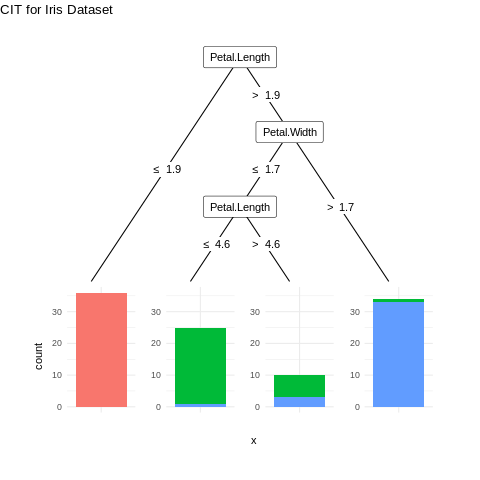

In [ ]:
%%R
# Plot tree with ggparty
ggparty(cit_model) +
  geom_edge() +
  geom_edge_label() +
  geom_node_splitvar() +
  geom_node_plot(gglist = list(geom_bar(aes(x = "", fill = Species), stat = "count"),
                               theme_minimal()),
                 shared_axis_labels = TRUE) +
  ggtitle("CIT for Iris Dataset")

#### Prediction and Evaluation

In [ ]:
%%R
#  Predict with holdout test data
cit_predictions <- predict(cit_model, newdata = test_data)

#  Validate model
cit_accuracy <- mean(cit_predictions == test_data$Species)
cat("CIT Classification Accuracy:", cit_accuracy, "\n")

CIT Classification Accuracy: 0.9777778 


#### Variable Importance


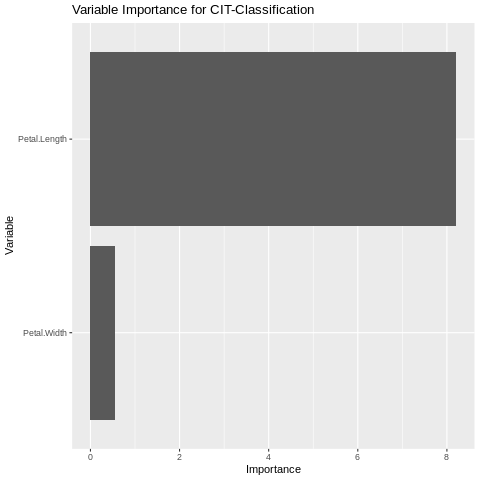

In [ ]:
%%R
# Calculate variable importance
var_imp_cit <- varimp(cit_model)
var_imp_cit <- sort(var_imp_cit, decreasing = TRUE) # Sort by importance
var_imp_cit <- data.frame(Variable = names(var_imp_cit), Importance = var_imp_cit)
# plot variable importance
ggplot(var_imp_cit, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Variable Importance for CIT-Classification", x = "Variable", y = "Importance")

### Regression Problems

Conditional Inference Trees (CITs) for regression work by recursively partitioning data based on statistical tests of independence, ensuring unbiased variable selection and robust stopping criteria. In this section, we will discuss the Conditional Inference Trees Regression algorithm, its working principles, and how to implement it in R.

#### Data

We will use the `Boston Housing` dataset, which contains information about housing values in suburbs of Boston. The dataset has 13 features (e.g., crime rate, number of rooms, etc.) and a continuous response variable (median value of owner-occupied homes).


In [ ]:
%%R
# Load and prepare Boston Housing data
data(BostonHousing, package = "mlbench")
set.seed(123)
# Split data into training and test sets
train_idx <- sample(1:nrow(BostonHousing), 0.7 * nrow(BostonHousing))
train_data <- BostonHousing[train_idx, ]
test_data <- BostonHousing[-train_idx, ]

#### Fit Conditional Inference Tree (CIT)




In [ ]:
%%R
cit_model <- ctree(medv ~ ., data = train_data, control = ctree_control(mincriterion = 0.999))
print(cit_model)


Model formula:
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + b + lstat

Fitted party:
[1] root
|   [2] lstat <= 9.93
|   |   [3] rm <= 7.42
|   |   |   [4] crim <= 4.54192
|   |   |   |   [5] rm <= 6.718
|   |   |   |   |   [6] rm <= 6.144: 20.596 (n = 27, err = 159.7)
|   |   |   |   |   [7] rm > 6.144: 24.900 (n = 65, err = 482.6)
|   |   |   |   [8] rm > 6.718: 31.551 (n = 41, err = 613.3)
|   |   |   [9] crim > 4.54192: 39.457 (n = 7, err = 1044.9)
|   |   [10] rm > 7.42: 46.865 (n = 17, err = 196.5)
|   [11] lstat > 9.93
|   |   [12] lstat <= 15.1: 20.768 (n = 88, err = 713.1)
|   |   [13] lstat > 15.1
|   |   |   [14] tax <= 437
|   |   |   |   [15] crim <= 0.55778: 19.146 (n = 26, err = 130.8)
|   |   |   |   [16] crim > 0.55778: 14.424 (n = 17, err = 51.2)
|   |   |   [17] tax > 437: 11.862 (n = 66, err = 735.0)

Number of inner nodes:    8
Number of terminal nodes: 9


#### Prune Tree

In [ ]:
%%R
# Prune tree (check if necessary)
cat("CIT Number of Nodes:", length(cit_model), "\n")
# Default mincriterion is usually sufficient; adjust if tree is too large

CIT Number of Nodes: 17 


#### Plot Tree

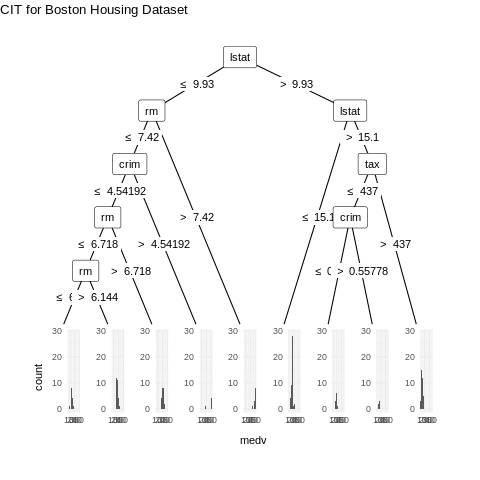

In [ ]:
%%R
ggparty(cit_model) +
  geom_edge() +
  geom_edge_label() +
  geom_node_splitvar() +
  geom_node_plot(gglist = list(geom_histogram(aes(x = medv), bins = 20),
                               theme_minimal()),
                 shared_axis_labels = TRUE) +
  ggtitle("CIT for Boston Housing Dataset")

#### Prediction and Evaluation



In [ ]:
%%R
# Predict with holdout test data
cit_predictions <- predict(cit_model, newdata = test_data)

# Validate model
cit_mse <- mean((cit_predictions - test_data$medv)^2)
cat("CIT Regression MSE:", cit_mse, "\n")

CIT Regression MSE: 22.27946 


#### Variable Importance

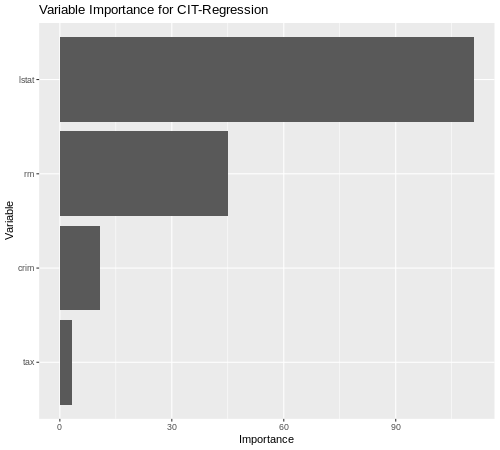

In [ ]:
%%R -w 500 -h 450 -u px
var_imp_cit <- varimp(cit_model)
var_imp_cit <- sort(var_imp_cit, decreasing = TRUE) # Sort by importance
var_imp_cit <- data.frame(Variable = names(var_imp_cit), Importance = var_imp_cit)
# plot variable importance
ggplot(var_imp_cit, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Variable Importance for CIT-Regression", x = "Variable", y = "Importance")

## Summary and Conclusions

Conditional Inference Trees (CITs) are a powerful and flexible tool for both classification and regression tasks. They offer several advantages over traditional decision trees, including unbiased variable selection, statistical rigor, and the ability to handle mixed data types. The implementation of CITs in R using the {partykit} package allows for easy fitting, pruning, and visualization of trees. The CIT algorithm is particularly useful in scenarios where unbiased variable selection and robust stopping criteria are essential, such as in medical or social science applications. In this tutorial we demonstrated how to implement CITs for both classification and regression tasks using the {partykit} package in R.


## References

1.  `The Elements of Statistical Learning: Data Mining, Inference, and Prediction*`by Trevor Hastie, Robert Tibshirani, and Jerome Friedman
    -   This comprehensive book delves into statistical learning methods, including tree-based approaches, and offers insights into the theoretical underpinnings that relate to CIT's statistical foundation.
2.  `Introduction to Statistical Learning: With Applications in R` by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani
    -   A more accessible introduction to statistical learning, this book covers decision trees and recursive partitioning, providing a practical context that aligns with CIT's methodology.
3.  `Tree-Based Methods for Statistical Learning` by Brandon M. Greenwell
    -   This book focuses specifically on tree-based methods, including conditional inference trees, with a blend of mathematical concepts and R code examples, making it highly relevant for CIT enthusiasts.

4.`Pattern Recognition and Machine Learning` by Christopher M. Bishop\
- This text explores machine learning algorithms, including decision trees, and offers a broader perspective that can enhance understanding of CIT's role in classification and regression tasks.

5.  `Applied Predictive Modeling` by Max Kuhn and Kjell Johnson
    -   Focused on predictive modeling techniques, this book includes discussions on tree-based methods and their applications, offering practical insights that complement CIT's approach to unbiased variable selection.

6.  [An introduction to conditional inference trees in R](https://www.geeksforgeeks.org/conditional-inference-trees-in-r-programming/)

7.  [https://martinschweinberger.github.io/TreesUBonn/](http://www.sthda.com/english/articles/35-statistical-machine-learning-essentials/141-decision-tree-essentials/)


